In [166]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **IMPORT**

In [167]:
from keras.datasets import mnist

In [168]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, AveragePooling2D, MaxPooling2D, Conv2D, Activation, Dropout, Flatten, Input, Dense, Concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt
from keras.utils import np_utils            
import random

In [227]:
import tensorflow as tf

# **PREPROCESSING**

In [169]:
(X_train_, y_train), (X_test, y_test) = mnist.load_data()

In [170]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


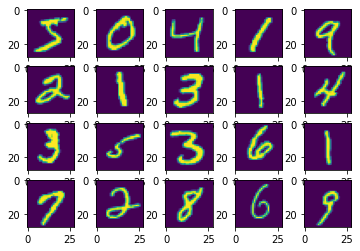

In [171]:
for i, image in enumerate(X_train[:20], 1):
    plt.subplot(4, 5, i)
    plt.imshow(image)

train_X[1]

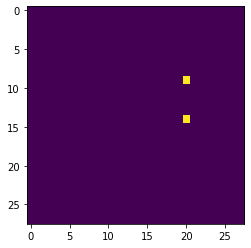

In [172]:
plt.imshow(train_X[1])

In [173]:
X_train[1].shape

(28, 28)

In [174]:
y_train[1]

0

In [175]:
X_train = X_train.reshape(60000, 784) 
X_test = X_test.reshape(10000, 784)   

X_train = X_train.astype('float32')   
X_test = X_test.astype('float32')

X_train /= 255                        
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [176]:
no_classes = 10

Y_train = np_utils.to_categorical(y_train, no_classes)
Y_test = np_utils.to_categorical(y_test, no_classes)

In [177]:
shape= (28,28,1)

In [191]:
X_train[1].shape

(784,)

# **MODEL**

In [209]:
del model

In [210]:
model= Sequential()

First layer

In [211]:
model.add(Conv2D(32, (3,3), padding='same', input_shape= shape))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

Second Layer

In [212]:
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

Third Layer

In [213]:

model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

4th layer

In [214]:
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

5th Layer

In [215]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())

Final Layer

In [216]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [217]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 activation_57 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 dropout_20 (Dropout)        (None, 28, 28, 32)        0         
                                                                 
 batch_normalization_39 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_46 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 activation_58 (Activation)  (None, 28, 28, 32)        0         
                                                     

# **Model Chart**

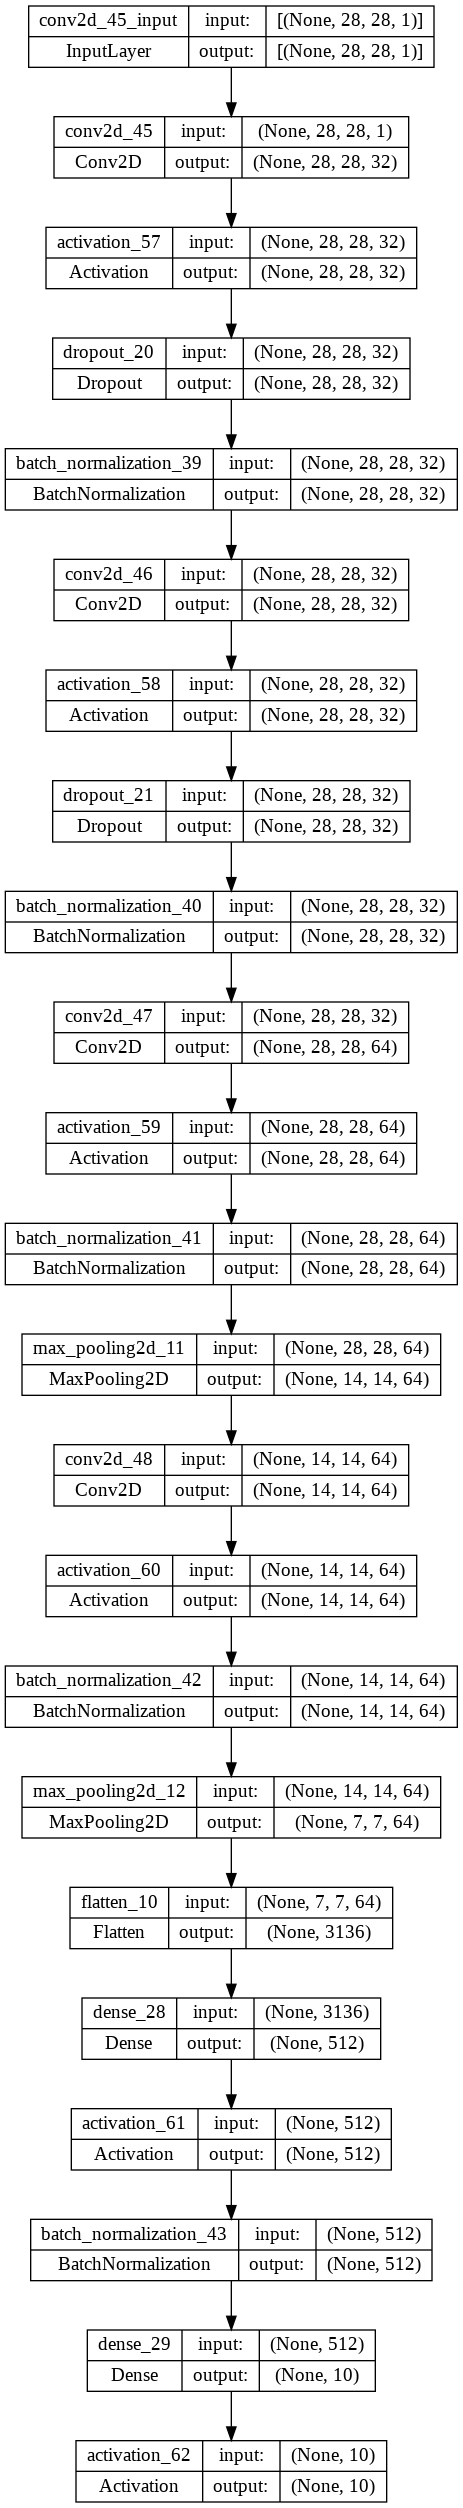

In [218]:
from keras.utils import plot_model
plot_model(model, to_file='model_chart.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image("model_chart.png")

# **COMPILE**

In [219]:
aug= ImageDataGenerator(rotation_range=0.18, zoom_range=0.15, width_shift_range=0.2, horizontal_flip=True)
lr=1e-3
epoch=10
batch_size=64
opt= SGD(learning_rate=lr, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics='accuracy')

In [223]:
X_train=X_train.reshape(-1, 28,28,1)

In [224]:
X_train[1].shape

(28, 28, 1)

In [228]:
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [229]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=10,
          verbose=1)

Epoch 1/10


/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


469/469 [==============================] - 573s 1s/step - loss: 0.2608 - accuracy: 0.9197
Epoch 2/10
469/469 [==============================] - 567s 1s/step - loss: 0.0887 - accuracy: 0.9733
Epoch 3/10
469/469 [==============================] - 568s 1s/step - loss: 0.0639 - accuracy: 0.9817
Epoch 4/10
469/469 [==============================] - 570s 1s/step - loss: 0.0511 - accuracy: 0.9850
Epoch 5/10
469/469 [==============================] - 566s 1s/step - loss: 0.0442 - accuracy: 0.9873
Epoch 6/10
469/469 [==============================] - 568s 1s/step - loss: 0.0392 - accuracy: 0.9888
Epoch 7/10
469/469 [==============================] - 568s 1s/step - loss: 0.0350 - accuracy: 0.9901
Epoch 8/10
469/469 [==============================] - 568s 1s/step - loss: 0.0320 - accuracy: 0.9906
Epoch 9/10
469/469 [==============================] - 565s 1s/step - loss: 0.0285 - accuracy: 0.9918
Epoch 10/10
469/469 [==============================] - 575s 1s/step - loss: 0.0266 - accuracy: 0.9927


# **Evaluate**

In [232]:
X_test= X_test.reshape(-1, 28,28,1)
score = model.evaluate(X_test, Y_test)
print('accuracy:', score[1])

  1/313 [..............................] - ETA: 29s - loss: 0.0185 - accuracy: 1.0000

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 26s 85ms/step - loss: 0.0312 - accuracy: 0.9904
accuracy: 0.9904000163078308


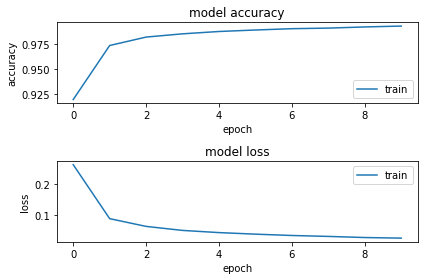

In [233]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()